In [1]:
%pylab inline
%matplotlib notebook
import sympy as sym

import matplotlib.pyplot as plt
%matplotlib inline

x = sym.Symbol('x')

f = 2*x**2+3
f




Populating the interactive namespace from numpy and matplotlib


2*x**2 + 3

In [2]:
z = f.subs(x, 2)
print('2(2)^2 + 3 =', z)


2(2)^2 + 3 = 11


In [3]:
dfdx = f.diff(x)
dfdx


4*x

In [4]:
print('df/dx at x = 3 is', dfdx.subs(x, 3))


df/dx at x = 3 is 12


In [5]:
y = sym.Symbol('y')
g = 2*sym.sin(x)**y**2
g

2*sin(x)**(y**2)

In [6]:
def fcn(x):
    return 2*x**2 + 3

In [7]:
z = fcn(2)
print('2(2)^2 + 3 =', z)

2(2)^2 + 3 = 11


In [8]:
polynomial = (2*x + 3)**4
polynomial.expand()

16*x**4 + 96*x**3 + 216*x**2 + 216*x + 81

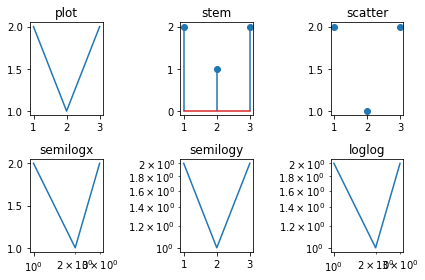

In [9]:
plotfuncs = [plt.plot,
             plt.stem,
             plt.scatter,
             plt.semilogx,
             plt.semilogy,
             plt.loglog]

for i, func in enumerate(plotfuncs, 1):
    plt.subplot(2, 3, i)
    func([1, 2, 3], [2, 1, 2])
    plt.title(func.__name__)
plt.tight_layout()

In [1]:
from ipywidgets import interact, widgets

# this is a sample function
def myfunc(x):
    return x*2

interact(myfunc,x=widgets.IntSlider(min=-10,max=10,value=0))


interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.myfunc(x)>

In [11]:
import lcapy
from lcapy import t, delta, u


In [12]:
v = 2 * t * u(t) + 3 + delta(t)
i = 0 * t + 3
i

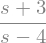

In [13]:
from lcapy import s, j, omega
H = (s + 3) / (s - 4)
H

In [14]:
x = t * 0.1
x

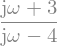

In [15]:
from lcapy import s, j, omega
H = (s + 3) / (s - 4)
A = H(j * omega)
A

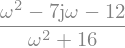

In [16]:
A.rationalize_denominator()

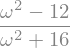

In [17]:
A.real

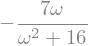

In [18]:
A.imag

In [19]:
A.N

In [20]:
A.D

In [21]:
A.phase

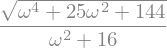

In [22]:
A.magnitude

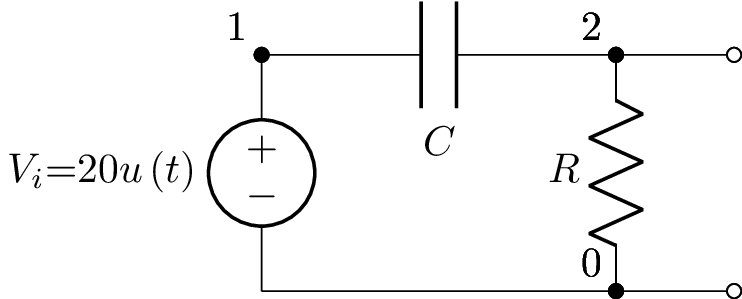

In [23]:
from lcapy import Circuit
 
cct = Circuit()
cct.add("""
Vi 1 0_1 step 20; down
C 1 2; right, size=1.5
R 2 0; down
W 0_1 0; right
W 0 0_2; right, size=0.5
P1 2_2 0_2; down
W 2 2_2;right, size=0.5""")
 
cct.draw(style='american')


In [2]:
import lcapy

# Define the circuit components
R = lcapy.R(1)
L = lcapy.L(2)
C = lcapy.C(3)

# Create the transistor
Q = lcapy.T("Q1")

# Create the parallel circuit
parallel_circuit = Q | R | L | C

# Create the overall circuit
circuit = parallel_circuit

# Draw the circuit
circuit.draw()

AttributeError: module 'lcapy' has no attribute 'T'

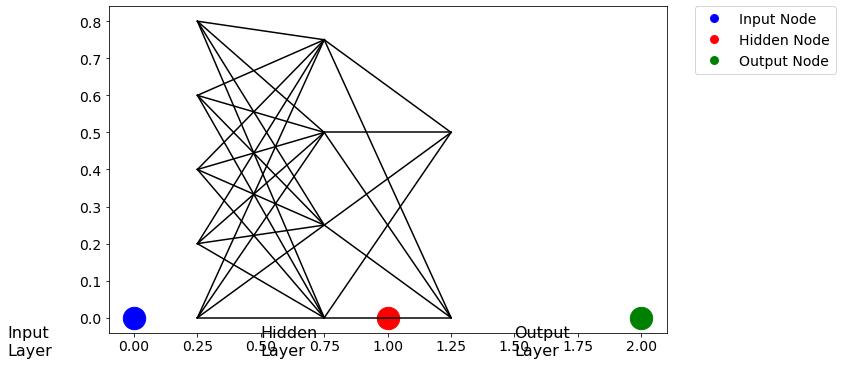

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 6))
plt.rc('font', size=14)

# Define the number of input, hidden, and output nodes
input_nodes = 5
hidden_nodes = 4
output_nodes = 2

# Create input layer
plt.scatter(0, 0, s=500, marker='o', c='b')
plt.text(-0.5, -0.1, 'Input\nLayer', fontsize=16)

# Create hidden layer
plt.scatter(1, 0, s=500, marker='o', c='r')
plt.text(0.5, -0.1, 'Hidden\nLayer', fontsize=16)

# Create output layer
plt.scatter(2, 0, s=500, marker='o', c='g')
plt.text(1.5, -0.1, 'Output\nLayer', fontsize=16)

# Connect input and hidden layers
for i in range(input_nodes):
    for j in range(hidden_nodes):
        plt.plot([0.25, 0.75], [i/input_nodes, j/hidden_nodes], c='k')

# Connect hidden and output layers
for i in range(hidden_nodes):
    for j in range(output_nodes):
        plt.plot([0.75, 1.25], [i/hidden_nodes, j/output_nodes], c='k')

# Add legend
custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10)]
plt.legend(custom_lines, ['Input Node', 'Hidden Node', 'Output Node'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Show the plot
plt.show()


In [24]:
import numpy as np
from matplotlib.pyplot import figure, savefig
from lcapy import Circuit

@interact(R=(1,10,1))
def response(R=1):
    cct = Circuit()
 
    cct.add('V 0_1 0 step 10;down')
    cct.add('L 0_1 0_2 1e-3;right')
    cct.add('C 0_2 1 1e-4;right')
    cct.add('R 1 0_4 {R};down'.format(R=R))
    cct.add('W 0_4 0; left')
 
    t = np.linspace(0, 0.01, 1000)
    vr = cct.R.v.evaluate(t)
 
    fig = figure()
    #Note that we can add Greek symbols from LaTex into the figure text
    ax = fig.add_subplot(111, title='Resistor voltage (R={}$\Omega$)'.format(R))
    ax.plot(t, vr, linewidth=2)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Resistor voltage (V)')
    ax.grid(True)
     
    cct.draw()

interactive(children=(IntSlider(value=1, description='R', max=10, min=1), Output()), _dom_classes=('widget-int…

In [25]:
chkbox = widgets.RadioButtons(
 options=['km', 'm', 'cm','mm'],
 value = 'm',
 description='Unit')
display(chkbox)

RadioButtons(description='Unit', index=1, options=('km', 'm', 'cm', 'mm'), value='m')

In [26]:
sel = widgets.Select(
 options=['km', 'm', 'cm','mm'],
 value='m',
 rows=3,
 description='Unit:')
display(sel)

Select(description='Unit:', index=1, options=('km', 'm', 'cm', 'mm'), rows=3, value='m')

In [27]:
chk = widgets.ToggleButton(
 value=False,
 description='Cats?',
 disabled=False,
 button_style='success',
 tooltip='Description',
 icon='check')
display(chk)
# In another cell
print(chk.value)

ToggleButton(value=False, button_style='success', description='Cats?', icon='check', tooltip='Description')

False


In [28]:
chkbox = widgets.Checkbox(
 value=False,
 description='Click Me',
 disabled=False,
 indent=False # Indents the checkbox by 1 level
 )
display(chkbox)

Checkbox(value=False, description='Click Me', indent=False)

In [29]:
txtsl = widgets.Text(
 placeholder='Enter you name',
 description='Name:'
 )
display(txtsl)
txtml = widgets.Textarea(
 value='this is the default value',
 placeholder='Type something',
 description='Essay input' )
display(txtml)

Text(value='', description='Name:', placeholder='Enter you name')

Textarea(value='this is the default value', description='Essay input', placeholder='Type something')

tab-less auto complete for jupyter 
pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install